
# HW2 - Model Building and Visualization

### Due: 03/11/2020 - 11pm

In this homework, you will use AutoML and model analysis to solve a classification problem on a tabular dataset.

The dataset `data.csv` contains 30 numerical features (X0 - 29), 1 categorical feature (XC) and 1 target (last column, y). Your goal is to create the best model to predict y based on the data features.


In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/yeb2Binfang/CS_9223_Visualization_for_ML/main/HW/HW2/data.csv")
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,XC,y
0,0.985703,0.899527,2.332283,1.044273,1.141718,-1.656647,-1.409265,1.043518,-0.931461,-1.726754,0.149757,0.723953,0.654222,-0.128981,-0.448738,0.001453,1.068472,0.547043,-1.446777,0.846647,1.385378,0.217853,0.628801,0.511403,0.562767,-0.356514,0.867604,-0.218642,-0.336591,0.096781,C,0
1,0.539816,0.243602,1.636048,-0.562150,-0.235560,-1.316039,1.529069,-1.415871,-1.167266,-0.103195,1.264812,-0.046112,-0.052789,0.713823,0.489074,1.449449,-0.241008,-1.530879,-0.140254,-2.218684,0.129662,2.020398,0.734907,0.929244,-0.805046,0.268788,1.025799,1.112271,1.492585,-0.497020,E,0
2,-1.424483,-0.470533,0.095100,0.131981,1.168902,-0.827530,-1.233111,0.556679,-1.384065,-1.197944,-0.401762,0.242434,-1.063001,-0.000186,-1.625695,0.549367,1.792426,-0.684977,0.380994,-0.007497,0.640268,1.470933,-1.398526,-2.139636,-1.238090,-0.139802,-2.317249,0.113483,0.521594,1.269208,E,0
3,-1.034157,-1.054496,0.339467,-0.829151,0.012123,0.048887,0.573195,-0.189184,-0.674289,0.975835,-0.040081,-0.119562,0.765592,-0.589195,0.054909,0.670680,0.034362,-1.151614,-0.598841,0.278923,2.565787,0.881025,0.305298,-0.368107,-0.664859,0.225715,-0.865773,-0.026332,-0.209023,0.074814,E,0
4,0.177091,1.154216,1.004133,-0.724015,-0.508090,-0.478284,-0.524431,1.841560,-1.147140,0.435025,-0.385504,-1.895292,0.336079,-0.706587,0.058675,-0.318922,0.252725,-0.756372,-1.619190,-0.413788,0.909173,0.515647,1.095991,-0.993104,-0.775456,0.938553,0.662388,0.483111,-0.910481,1.544431,E,0


In order to create this model, you will have to:
1. Explore the data using visualizations and statistics
    * What are the feature distributions (compute histograms for them)?
    * Is the data correlated?
        * Check Pearson correlation between columns. 
        * Try looking at the scatterplot of the dimensions.
    * Can you remove unnecessary features?
        * Alternatively, can you reduce the dimensionality of the data with PCA?
2. Preprocess the data
    * One-Hot-Encode categorical variable
    * Check if you need to normalize the data
3. Solve the classification problem using Auto-Sklearn. Try different dataset inputs.
    * With / Without categorical feature
    * With / Without normalization
    * With / Without feature selection / PCA
4. Explore the models using PipelineProfiler. What primitives perform well for this task?
4. Select the best model out of your experiments (split the data in a 70/30 Training/Validation set)
    
    
    

## Explore the data using visualizations and statistics
* What are the feature distributions (compute histograms for them)?
* Is the data correlated?
 * Check Pearson correlation between columns.
 * Try looking at the scatterplot of the dimensions.
* Can you remove unnecessary features?
 * Alternatively, can you reduce the dimensionality of the data with PCA?

### feature distributions

https://blog.csdn.net/qq_36187610/article/details/110188100#:~:text=%E4%B8%80.%20%E4%BB%80%E4%B9%88%E6%98%AF%E7%89%B9%E5%BE%81%E5%88%86%E5%B8%83,%E7%B1%BB%E5%88%AB%E6%A0%B7%E6%9C%AC%E7%9A%84%E5%88%86%E5%B8%83%E6%83%85%E5%86%B5%E3%80%82&text=%E6%A0%B7%E6%9C%AC%E5%88%86%E5%B8%83%E6%8C%87%E7%9A%84%E5%B0%B1%E6%98%AF,%E6%A0%B7%E6%9C%AC%E5%88%86%E5%B8%83%E4%B8%BA%E5%9D%87%E5%8C%80%E5%88%86%E5%B8%83%E3%80%82

https://peltarion.com/knowledge-center/documentation/datasets-view/edit-an-imported-dataset-for-use-in-experiments/feature-distribution

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [66]:
column_name = df.columns
print(column_name)
column_names = column_name[0:10]
print(column_names)

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'XC',
       'y'],
      dtype='object')
Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'], dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

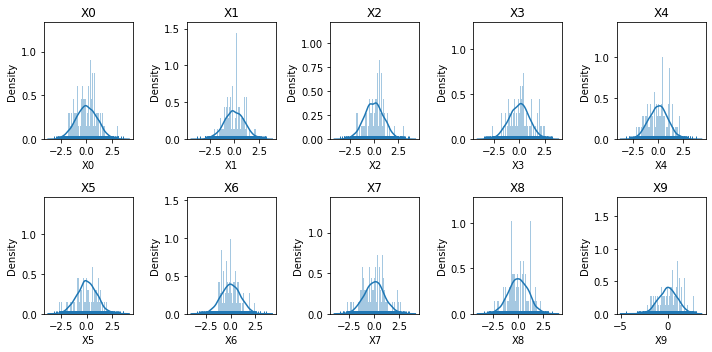

In [67]:
plt.figure(figsize=(10,5))
for i, name in enumerate(column_names):
  plt.subplot(2,5,i+1)
  sns.distplot(df[name], bins=3000, hist=True, kde=True, norm_hist=False, rug=True,
              vertical=False, axlabel=None, label=None, ax=None,
              fit=None)
  plt.title(name)
  plt.tight_layout()
plt.show()


### Homework submission

You should submit your homework on github classroom. The submission should contain:
- Jupyter Notebook with the code and output of your experiments
- Report (PDF) describing your experiments and results (steps 1-5)
    - Data insights (visualizations)
    - AutoML experiments
    - PipelineProfiler insights (best pipeline in the ensemble, primitives most correlated with high scores, ...)
    - What is the best model accuracy on held out data?